In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
from sklearn.decomposition import FactorAnalysis

In [2]:
# Load spike data
spike_data = np.load('data/spikes_v1_clean.npy')                      
spike_data_t = spike_data[:,10000:10999]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]


(336, 115379)


In [3]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
print(scaled_data.shape)

(336, 999)


In [4]:
#sns.heatmap(scaled_data.corr())

In [5]:
#Applying PCA

#Taking no. of Principal Components r
r = 200
FA = FactorAnalysis(n_components = r,random_state=0)



# X = USV'
data_pca = FA.fit_transform(scaled_data) # = US


c = FA.components_      # V
print(c)
print(c.shape)
f = FA.n_features_in_ # S
print(f)


[[ 6.11010767e-01  4.44588807e-01  6.43644377e-01 ...  6.18674487e-01
   4.45879560e-01  3.55951497e-01]
 [-1.05337863e-01  8.67239322e-02  1.31090391e-01 ...  8.02069808e-02
  -1.38434190e-01 -9.07875113e-02]
 [-7.87223997e-02  6.27748476e-02 -1.86602147e-01 ... -1.17127072e-01
  -1.66108831e-02  1.22233177e-01]
 ...
 [ 3.99369701e-03 -4.35810301e-02  8.48369597e-03 ...  4.96954287e-03
  -9.32396102e-03  2.27264881e-03]
 [ 2.30689724e-03  2.32370830e-03 -1.43587615e-02 ... -3.22480854e-03
   4.10504962e-03 -5.41229630e-04]
 [-9.60912147e-04 -5.87892335e-02 -8.37863993e-03 ... -1.50615947e-03
   1.13392748e-03 -8.69817439e-05]]
(200, 999)
999


In [6]:
# Project data into low dim space 
# X_proj = U'X
# X_proj = inv(S)S'U'X
#spike__projected = np.linalg.inv(S)@data_pca.T@scaled_data

#print(spike_new_proj)

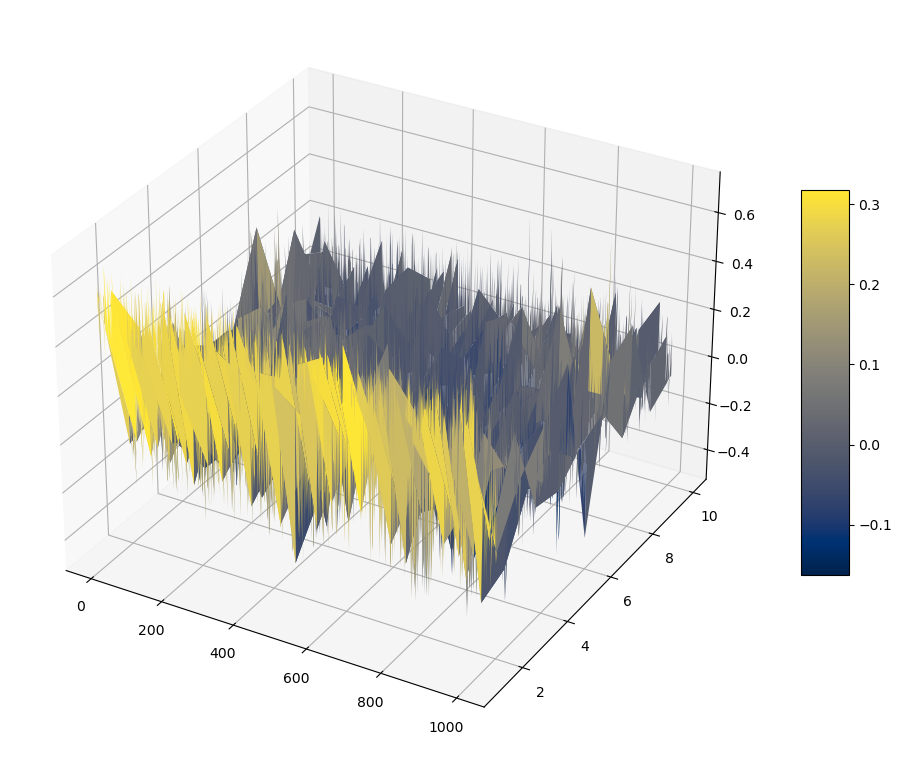

In [7]:
#spike_projected = pd.DataFrame.to_numpy(spike__projected)
dims=10
time = np.linspace(1, t, t)
d = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, d)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:dims,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

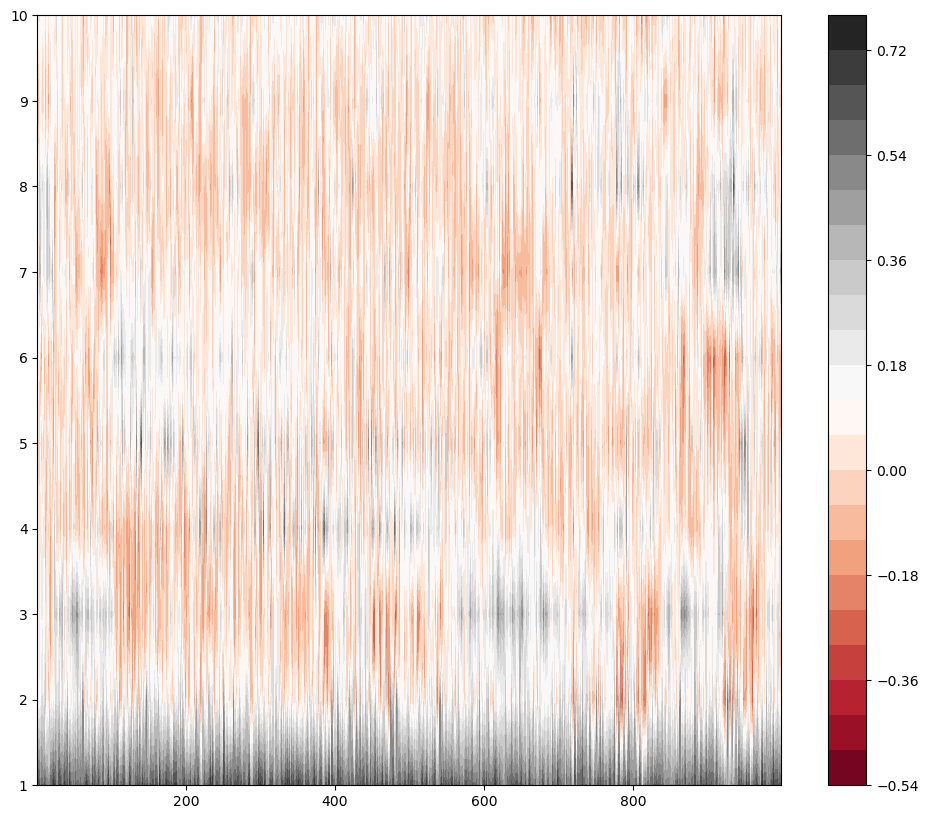

In [8]:
fig = plt.figure(figsize = (12,10))
plt.contourf(T, N, c[0:dims,:], 20, cmap='RdGy')
plt.colorbar();

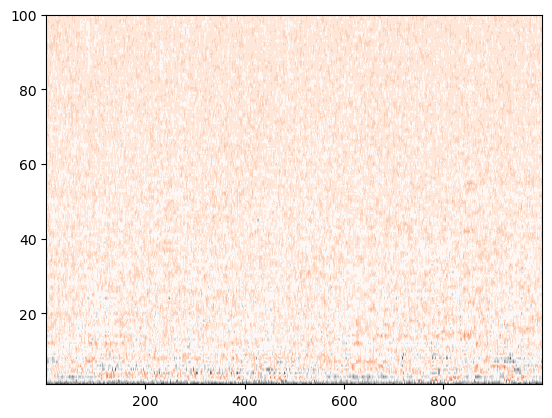

In [9]:
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 100, 100)
#print(time.shape)
#print(time)
#print(neurons.shape)
#print(neurons)
T, N = np.meshgrid(time, neurons)


plt.contourf(T, N, c[0:100,:], 20, cmap='RdGy')

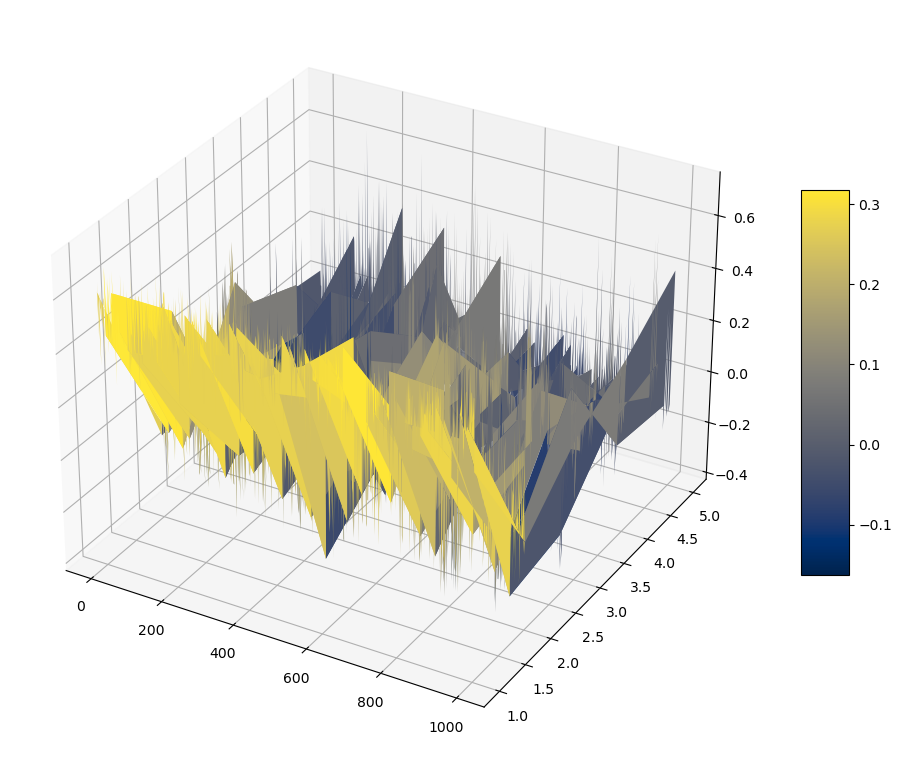

In [10]:
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 5, 5)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:5,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

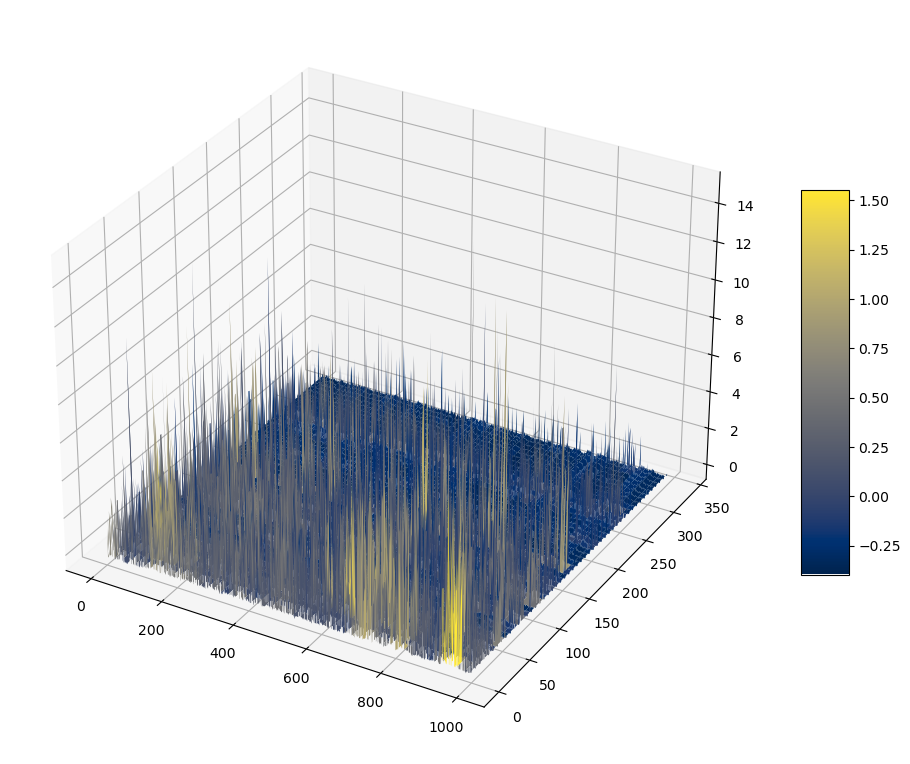

In [11]:
scaled = pd.DataFrame.to_numpy(scaled_data)
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 336, 336)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, scaled, cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

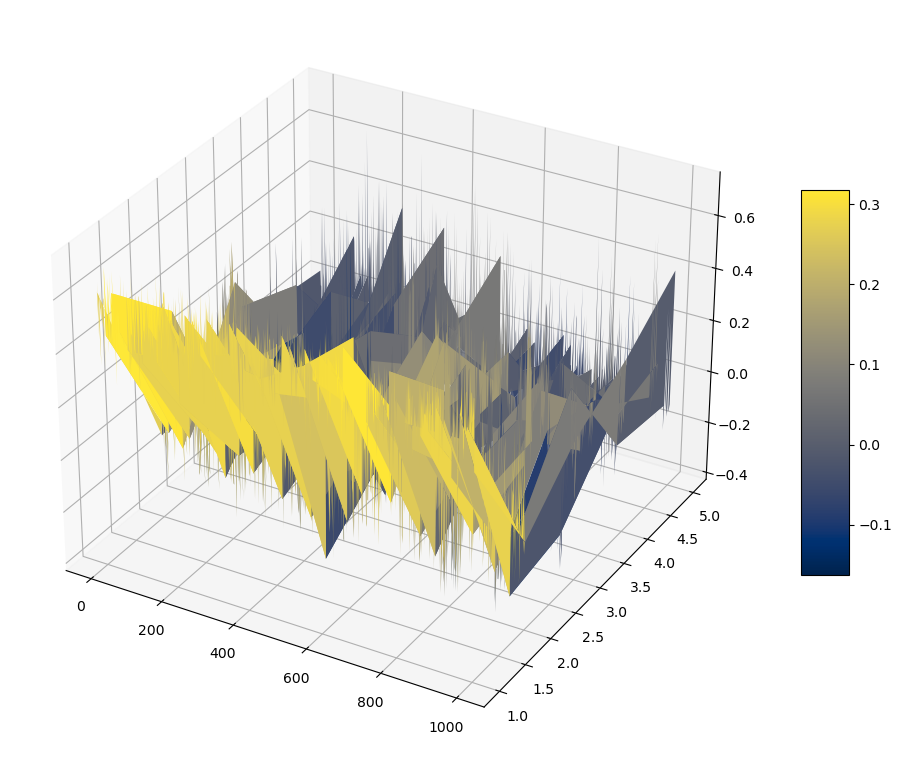

In [12]:
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 5, 5)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:5,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [14]:
%matplotlib qt
dims=200
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:dims,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()